In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from matplotlib.legend_handler import HandlerLine2D

In [2]:
df = pd.read_excel('telecom_churn.xlsx')
print("Количество наблюдений: ", df.shape[0])
print("Количество атрибутов: ", df.shape[1])

Количество наблюдений:  7043
Количество атрибутов:  20


In [3]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# gender - пол
# SeniorCitizen - является ли клиент пенсионером
# Partner - состоит ли клиент в паре
# Dependents - есть ли у клиента кто-то на иждивении
# tenure - сколько месяцев человек является клиентом компании
# PhoneService - подключен ли телефон у клиента
# MultipleLines - подключено ли несколько телефонных линий
# InternetService - подключен ли интернет
# OnlineSecurity - услуги интернета
# OnlineBackup - услуги интернета
# DeviceProtection - услуги интернета
# TechSupport - услуги интернета
# StreamingTV - услуги интернета
# StreamingMovies - услуги интернета
# Contract - тип договора
# PaperlessBilling - электронная оплата
# PaymentMethod - способ оплаты
# MonthlyCharges - абонентская плата в месяц
# TotalCharges - общий доход, который клиент принес компании
# Churn - ушел клиент или нет

In [5]:
# Cтатистика по данным
description = df.describe(include='all')
description
#description.to_excel("../data/data_description.xlsx")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# Зависимая переменная
y = df.Churn.eq('Yes').astype(int)
X = df.drop('Churn', axis=1)

<AxesSubplot:>

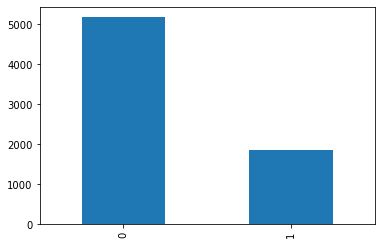

In [8]:
y.value_counts().plot(kind='bar')

In [9]:
# Кол-во пропусков
X.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [10]:
# tenure == 0 новый клиент
X.tenure[X.tenure == 0].count()

11

In [11]:
X.TotalCharges[df.tenure == 0]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [12]:
# Пропуски означают, что новые клиенты еще не принесли никакой прибыли
X.TotalCharges = X.TotalCharges.fillna(0.0)

In [13]:
X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [14]:
# Многие атрибуты нерелевантны для тех, у кого не подключен интернет
# Создадим новый стобец hasInternetService
# И два новых бинарных стобца: hasFiber и hasDSL
X = X.assign(hasInternetService = X.InternetService.ne('No').astype(int))
X = X.assign(hasFiber = X.InternetService.eq('Fiber optic').astype(int))
X = X.assign(hasDSL = X.InternetService.eq('DSL').astype(int))

X.drop('InternetService', axis=1, inplace=True) # столбец InternetService теперь не нужен

In [15]:
# Преобразуем бинарные переменные в 0 и 1
X.gender = X.gender.eq('Male').astype(int)

yesOrNoVariableColumns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                          'PaperlessBilling']

for column in yesOrNoVariableColumns:
    X[column] = X[column].eq('Yes').astype(int)

In [16]:
# Оставшиеся категориальные переменные преобразуем в фиктивные переменные
X = pd.get_dummies(X, drop_first=True)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,hasInternetService,hasFiber,hasDSL,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,1,0,1,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,1,0,1,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,1,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,1,0,1,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,1,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,1,0,1,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,1,0,0,0,0,0,1


<AxesSubplot:>

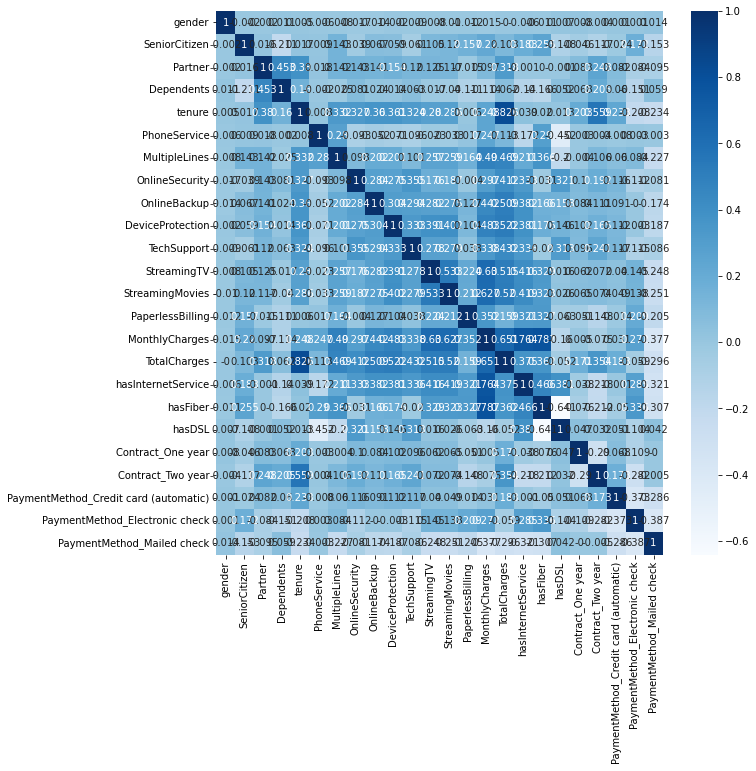

In [17]:
corr_matrix = X.corr().round(3)
plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='Blues', fmt='g')

In [18]:
#corr_matrix.to_excel('correlations.xlsx')

In [19]:
# Нижний треугольник матрицы
triangle = corr_matrix.abs().where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

print("Самая сильная корреляция:")
triangle.stack().sort_values(ascending=False)[:15]

Самая сильная корреляция:


TotalCharges        tenure              0.826
hasFiber            MonthlyCharges      0.787
hasInternetService  MonthlyCharges      0.764
TotalCharges        MonthlyCharges      0.651
hasDSL              hasFiber            0.641
MonthlyCharges      StreamingTV         0.630
                    StreamingMovies     0.627
Contract_Two year   tenure              0.559
StreamingMovies     StreamingTV         0.533
TotalCharges        DeviceProtection    0.522
                    StreamingMovies     0.520
                    StreamingTV         0.515
                    OnlineBackup        0.509
MonthlyCharges      MultipleLines       0.490
                    DeviceProtection    0.483
dtype: float64

In [100]:
# Убираем столбцы с сильной корреляцей
to_drop = ['tenure', 'MonthlyCharges']
X = X.drop(to_drop, axis=1)

In [20]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,hasInternetService,hasFiber,hasDSL,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2279.734304,0.783331,0.439585,0.343746,0.209144,0.240664,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.794470,0.412004,0.496372,0.474991,0.406726,0.427517,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,398.550000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1394.550000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Разделим данные на две части: 30% отложим для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [22]:
clf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=50, class_weight='balanced_subsample')

In [23]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Результат на тестовых данных (модель по умолчанию):', (100 * balanced_accuracy_score(y_test, y_pred)))

Результат на тестовых данных (модель по умолчанию): 66.55945645715467


In [25]:
parametrs = {'criterion': ['gini', 'entropy'],
             'max_depth': range(3, 15), 
             'min_samples_split': range(1, 11),
             'max_features': range(1, 25)}

In [26]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5, n_jobs=-1, scoring='balanced_accuracy')

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

In [109]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 6}

In [110]:
best_clf = grid_search_cv_clf.best_estimator_

In [111]:
y_pred = best_clf.predict(X_test)

In [112]:
print('Результат на тестовых данных:', (100 * balanced_accuracy_score(y_test, y_pred)))

Результат на тестовых данных: 76.47368828954507


In [115]:
cnf_matrix = confusion_matrix(y_test, y_pred)

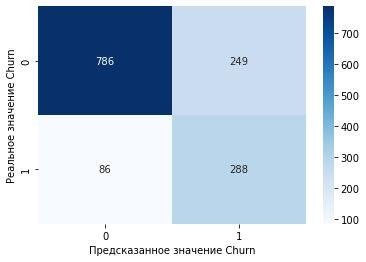

In [116]:
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Реальное значение Churn')
plt.xlabel('Предсказанное значение Churn')
plt.show()